# 1D Kalman Filter

Now, you're ready to implement a 1D Kalman Filter by putting all these steps together. Let's take the case of a robot that moves through the world. As a robot moves through the world it locates itself by performing a cycle of:
1. sensing and performing a measurement update and
2. moving and performing a motion update

You've programmed each of these steps individually, so now let's combine them in a cycle!

After implementing this filter, you should see that you can go from a very uncertain location Gaussian to a more and more certain Gaussian, as pictured below. The code in this notebooks is really just a simplified version of the Kalman filter that runs in the Google self-driving car that is used to track surrounding vehicles and other objects.

<img src='images/gaussian_updates.png' height=70% width=70% />

---

Below is our usual Gaussian equation and imports.

In [1]:
# import math functions
from typing import List, Tuple
from math import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# gaussian function
def f(mu: float, sigma2: float, x: float) -> float:
   """Computes the Gaussian probability density function from 
   the provided parameters.

   Args:
      mu: Mean value as measure of central tendency
      sigma2: Variance as measure of spread
      x: Input value
      
   Returns:
      Gaussian probability density value
   """
   coefficient: float = 1.0 / sqrt(2.0 * pi *sigma2)
   exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
   return coefficient * exponential


You've also been given the complete `update` code that performs a parameter update when an initial belief and new measurement information are merged. And the complete `predict` code that performs an update to a Gasuuain after a motion is incorporated.

In [3]:
# the update function
def update(mean1: float, var1: float, mean2: float, var2: float) -> Tuple[float, float]:
    """Takes in two means and two squared variance terms for the prior and measurement 
    distributions and returns updated gaussian parameters for posterior probability 
    density function.

    Args:
        mean1: Mean for the prior probability density function 
        var1: Variance for the prior probability density function
        mean2: Mean for the measurement function
        var2: Variance for the measurement function

    Returns:
        Tuple of mean and variance for posterior probability density function
    """
    new_mean: float = ((var2 * mean1) + (var1 * mean2)) / (var1 + var2)
    new_var: float = 1. / ((1. / var2) + (1. / var1))
    return new_mean, new_var


# the motion update/predict function
def predict(mean1: float, var1: float, mean2: float, var2: float) -> Tuple[float, float]:
    """Computes the motion update. It means we take the mean and variance of the 
    probability distribution prior to the movement and add the motion vector to 
    the same. In Kalman filtering [mean2, var2] together denotes a motion vector.

    Args:
        mean1: Mean of the probability distribution before the motion
        var1 Variance of the probability distribution before the motion
        mean2: Mean component of the motion vector
        var2: Variance component of the motion vector
    
    Returns:
        Tuple of mean and variance for the probability distribution 
        after the motion
    """
    new_mean: float = mean1 + mean2
    new_var: float = var1 + var2
    return new_mean, new_var

### QUIZ: For the given measurements and motions, write complete 1D Kalman filter code that loops through all of these in order.

Your complete code should look at sensor measurements then motions in that sequence until all updates are done!

### Initial Uncertainty

You'll see that you are given initial parameters below, and this includes an initial location estimation, `mu` and squared variance, `sig`. Note that the initial estimate is set to the location 0, and the variance is extremely large; this is a state of high confusion much like the *uniform* distribution we used in the histogram filter. There are also values given for the squared variance associated with the sensor measurements and the motion, since neither of those readings are perfect, either.

You should see that even though the initial estimate for location (the initial `mu`) is far from the first measurement, it should catch up fairly quickly as you cycle through measurements and motions.

In [7]:
# measurements for mu and motions, U
measurements: List[float] = [5., 6., 7., 9., 10.]
motions: List[float] = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig: float = 4. # Variance / Uncertainty associated with the measurement update
motion_sig: float = 2. # Variance / Uncertainty associated with the motion update
mu: float = 0. # Initial location estimation.
sig: float = 10000. # Initial location variance. (sig is the variance, not standard deviation) A large variance denotes a state of high confusion.

## TODO: Loop through all measurements/motions
## Print out and display the resulting Gaussian 
for meas, mot in zip(measurements, motions):
    # Measurement update
    new_meas_mu, new_meas_sig = update(mean1=mu, var1=sig, mean2=meas, var2=measurement_sig)
    print(f'After Measurement: Mean: {new_meas_mu} Variance/Uncertainty: {new_meas_sig}')
    # Motion update
    mu, sig = predict(mean1=new_meas_mu, var1=new_meas_sig, mean2=mot, var2=motion_sig)
    print(f'After Motion: Mean: {mu} Variance/Uncertainty: {sig}')

print()
print(f'Final Estimate: Mean: {mu} Variance/Uncertainty: {sig}')

After Measurement: Mean: 4.998000799680128 Variance/Uncertainty: 3.9984006397441023
After Motion: Mean: 5.998000799680128 Variance/Uncertainty: 5.998400639744102
After Measurement: Mean: 5.999200191953932 Variance/Uncertainty: 2.399744061425258
After Motion: Mean: 6.999200191953932 Variance/Uncertainty: 4.399744061425258
After Measurement: Mean: 6.999619127420922 Variance/Uncertainty: 2.0951800575117594
After Motion: Mean: 8.999619127420921 Variance/Uncertainty: 4.09518005751176
After Measurement: Mean: 8.999811802788143 Variance/Uncertainty: 2.0235152416216957
After Motion: Mean: 9.999811802788143 Variance/Uncertainty: 4.023515241621696
After Measurement: Mean: 9.999906177177365 Variance/Uncertainty: 2.0058615808441944
After Motion: Mean: 10.999906177177365 Variance/Uncertainty: 4.005861580844194

Final Estimate: Mean: 10.999906177177365 Variance/Uncertainty: 4.005861580844194


### Plot a Gaussian

Plot a Gaussian by looping through a range of x values and creating a resulting list of Gaussian values, `g`, as shown below. You're encouraged to see what happens if you change the values of `mu` and `sigma2`.

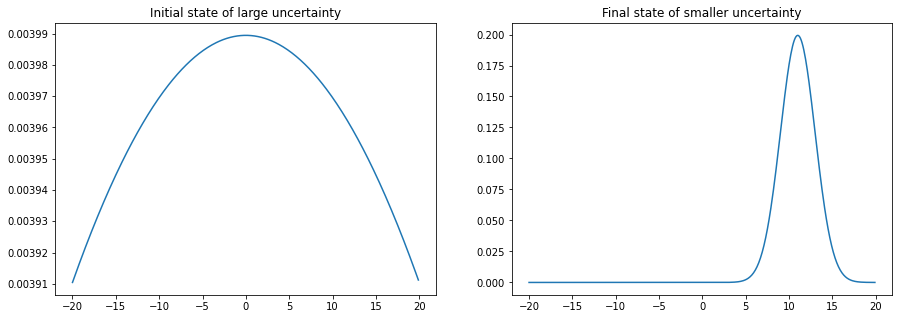

In [17]:
# display the *initial* gaussian over a range of x values
# define the parameters
initial_estimate: Tuple[float, float] = 0., 10000.
final_estimate: Tuple[float, float] = mu, sig

_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# define a range of x values
x_axis: np.ndarray = np.arange(-20, 20, 0.1)

# create a corresponding list of gaussian values
initial_state: List[float] = list(map(lambda x: f(mu=initial_estimate[0], sigma2=initial_estimate[1], x=x), x_axis))
final_state: List[float] = list(map(lambda x: f(mu=final_estimate[0], sigma2=final_estimate[1], x=x), x_axis))

ax1.plot(x_axis, initial_state)
ax1.set_title('Initial state of large uncertainty')

ax2.plot(x_axis, final_state)
ax2.set_title('Final state of smaller uncertainty');